In [2]:
import importlib

Scientist and engineers validate bridge characteristics over time by, by using control vehicles, or more commonly, weighting random vehicles, that have crossed the bridge, and comparing the measurements afterward. Therefore, identifying which measurement belongs to which vehicle is necessary. 

## Dataset Preparation

Important considerations regarding the license plate dataset is, that it should reflect real life conditions. From a surveillance system capturing moving objects, blurry images are expected. 

In calculating bridge degradation over time, heavy vehicles share a higher contribution to the structural integrity of the bridge. Consequently, detecting licence plates in case of heavy vehicles is more important.

[**Large-License-Plate-Dataset**](https://www.kaggle.com/datasets/fareselmenshawii/large-license-plate-dataset) consists of 24K images with abundand heavy type vehicles. You can download the dataset with the following script or manually by clicking on the link. 

In [9]:
import kagglehub

# Download dataset from Kaggle
path = kagglehub.dataset_download('fareselmenshawii/large-license-plate-dataset')

100%|██████████| 2.35G/2.35G [01:28<00:00, 28.5MB/s]

Extracting files...


Check if the annotations for images conform to the YOLO standard specification, by visualizing 4 random images from the dataset.

This step is important, as the quality of the dataset, not only impacts the performance of the model, but the efficiency of the training as well. This can lead to training stagnation, or even unlearning. Therefore, training datasets should be inspected beforehand.

Generally, during inspection we should look for the following phenomenon:
- **Occlusion:** Objects labeled are hidden, to the point that they are almost unidentifiable. Another type of occlusion is proximity to other labeled objects.
- **Consistent labeling:** Each and every object that the model should learn to recognise should be labeled in the dataset. Furthermore, only subject object are be labeled, no irrelevant objects are annotated. 
- **Missing labels:** Corresponding labels file may be missing. This can be easily inspected by comparing directory sizes for labels and images.
- **Image Quality:** Although low resolution and blurry images may lead to poor training, it may also lead to robust models.
- **Variaty:** Incomplete coverage of object types and formats, may lead to poor performance in case of edge case scenarios.

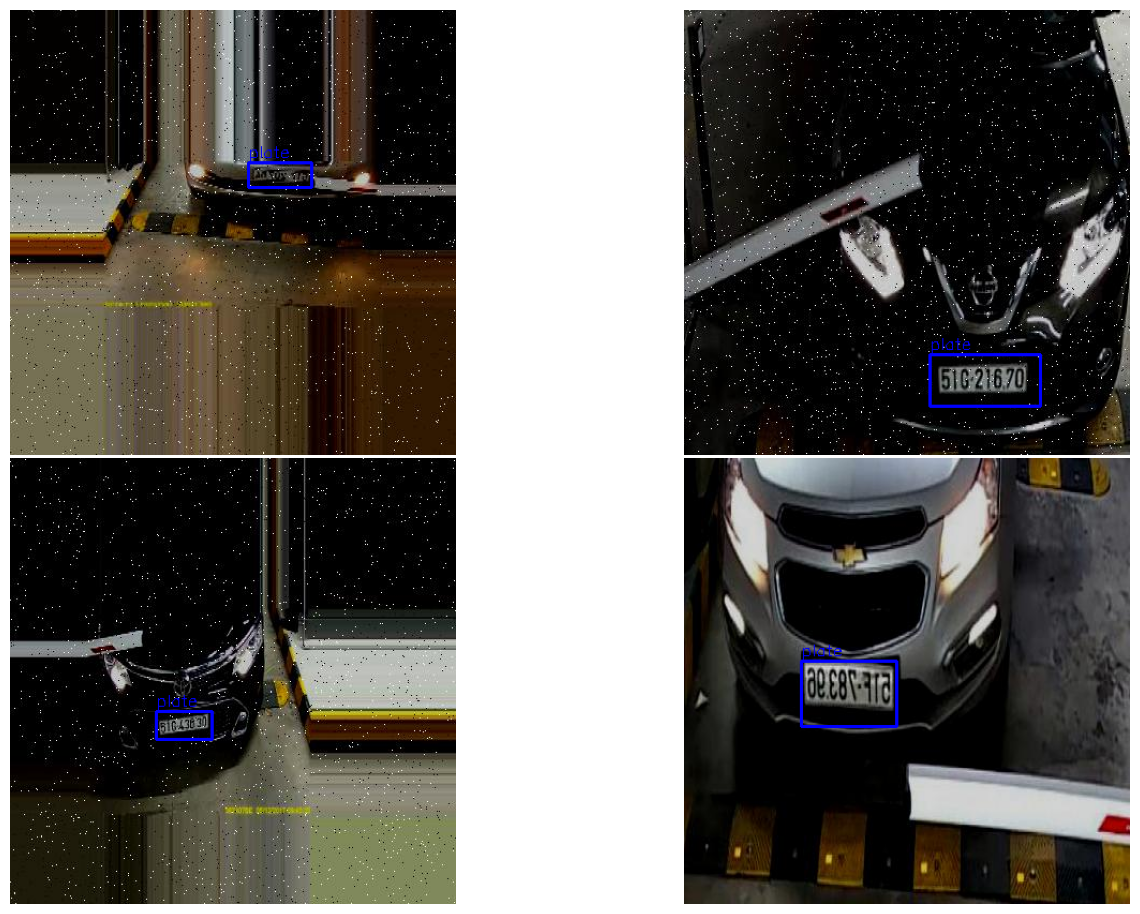

In [9]:
# Reload changes in submodule
import utils.plot
importlib.reload(utils.plot)

# Path to the image and labels dataset
images_dir = './datasets/large-license-plate/train/images'
labels_dir = './datasets/large-license-plate/train/labels'
object_names = ['plate']

# Sample 4 random image and label paths
images_path, labels_path = utils.plot.random_images(images_dir, 4, labels_dir)

# Read images and labels in memory
images = utils.plot.read_images(images_path)
images = [utils.plot.convert_color(image, 'bgr2rbg') for image in images]
labels = utils.plot.read_labels(labels_path)
    
# Frame detection object on every image, to validate object types and correct label annotation
framed_images = []
for image, label in zip(images, labels):
    image_with_detections = utils.plot.boxes(image, label, object_names)
    framed_images.append(image_with_detections)

# Visualize detection objects in UC-Detract dataset
utils.plot.grid(framed_images, layout=(2, 2), figsize=(16, 9))

# Delete unused plot information
del framed_images, images_path, labels_path
del images, labels

## Training



In [1]:
import torch
from ultralytics import YOLO

# A small model would suffice
model = YOLO('yolov8s.pt')

# Add tensorboard callback to visualize training progress

# Train on GPU if is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Train the model on the dataset
result = model.train(data='./datasets/large-license-plate/license.yaml', epochs=50, device=device, imgsz=640, plots=True)
print(result)

engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=./datasets/large-license-plate/license.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimiz

train: Scanning /home/davevarga/Projects/bwim-cam/datasets/large-license-plate/labels/train.cache... 25470 images, 18 backgrounds, 0 corrupt: 100%|██████████| 25470/25470 [00:00<?, ?it/s]
val: Scanning /home/davevarga/Projects/bwim-cam/datasets/large-license-plate/labels/val.cache... 1073 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1073/1073 [00:00<?, ?it/s]


Plotting labels to /home/davevarga/PycharmProjects/bwim-cam/runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/davevarga/PycharmProjects/bwim-cam/runs/detect/train7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.91G       1.25     0.9053      1.155         24        640: 100%|██████████| 1592/1592 [11:41<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.86it/s]

                   all       1073       1573      0.804      0.707      0.744      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       3.7G      1.226     0.6492       1.14         30        640: 100%|██████████| 1592/1592 [11:34<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.96it/s]

                   all       1073       1573      0.806      0.685      0.745      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.73G      1.261     0.7123      1.169         21        640: 100%|██████████| 1592/1592 [11:30<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.98it/s]

                   all       1073       1573      0.717      0.583      0.599      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.72G      1.271     0.7256      1.191         25        640: 100%|██████████| 1592/1592 [11:28<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.97it/s]

                   all       1073       1573      0.786      0.661      0.702      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.71G      1.251     0.6836      1.177         36        640:  21%|██        | 330/1592 [02:23<09:08,  2.30it/s]


KeyboardInterrupt: 